In [1]:
library(h2o)
localH2O <- h2o.init(min_mem_size = '10G', nthreads = 4)

Loading required package: statmod

----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: ‘h2o’

The following objects are masked from ‘package:stats’:

    sd, var

The following objects are masked from ‘package:base’:

    %*%, apply, as.factor, as.numeric, colnames, colnames<-, ifelse,
    %in%, is.factor, is.numeric, log, trunc




H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    /tmp/RtmpKITOHY/h2o_admin_started_from_r.out
    /tmp/RtmpKITOHY/h2o_admin_started_from_r.err


..Successfully connected to http://127.0.0.1:54321/ 

R is connected to the H2O cluster: 
    H2O cluster uptime:         1 seconds 883 milliseconds 
    H2O cluster version:        3.6.0.8 
    H2O cluster name:           H2O_started_from_R_admin_etk483 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   9.58 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 



Loading data:

In [12]:
#trainset.hex <- h2o.uploadFile(path = 'trainset_values.csv', destination_frame = 'trainset.hex', sep = ',', header = TRUE)
all.hex <- h2o.uploadFile(path = 'trainsetImpute.csv', destination_frame = 'all.hex', sep = ',', header = TRUE)
trainset.hex <- all.hex[all.hex$type == 'train',]
labels.hex <- h2o.uploadFile(path = 'trainset_labels.csv', destination_frame = 'labels.hex', sep = ',', header = TRUE)

trainsetFull.hex <- h2o.merge(trainset.hex, labels.hex)
trainsetFull.split <- h2o.splitFrame(trainsetFull.hex)

allVariables <- colnames(trainsetFull.hex)
predictors <- colnames(trainsetFull.hex)[!(allVariables 
                                           %in% c('id', 'wpt_name', 'subvillage', 'scheme_name', 'installer', 'funder',
                                                  'status_group', 'ward_lga', 'type', 'recorded_by'))]


  |======================================================================| 100%
  |======================================================================| 100%


In [13]:
head(trainsetFull.hex)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,ellip.h,source_class,waterpoint_type,waterpoint_type_group,date_recorded_year,date_recorded_year_ago,date_recorded_month,date_recorded_day,type,construction_age,status_group
1,69572,6000,1.300061e+12,Roman,1390,Roman,34.93809,-9.856322,none,0,⋯,groundwater,communal standpipe,communal standpipe,2011,4,3,14,train,16,functional
2,8776,0,1.362528e+12,Grumeti,1399,GRUMETI,34.69877,-2.147466,Zahanati,0,⋯,surface,communal standpipe,communal standpipe,2013,2,3,6,train,5,functional
3,34310,25,1.36175e+12,Lottery Club,686,World vision,37.46066,-3.821329,Kwa Mahundi,0,⋯,surface,communal standpipe multiple,communal standpipe,2013,2,2,25,train,6,functional
4,67743,0,1.359331e+12,Unicef,263,UNICEF,38.48616,-11.1553,Zahanati Ya Nanyumbu,0,⋯,groundwater,communal standpipe multiple,communal standpipe,2013,2,1,28,train,29,non functional
5,19728,0,1.310515e+12,Action In A,0,Artisan,31.13085,-1.825359,Shuleni,0,⋯,surface,communal standpipe,communal standpipe,2011,4,7,13,train,18.42413,functional
6,9944,20,1.299974e+12,Mkinga Distric Coun,0,DWE,39.1728,-4.765587,Tajiri,0,⋯,unknown,communal standpipe multiple,communal standpipe,2011,4,3,13,train,6,functional


Train with random forest:

In [14]:
firstRf <- h2o.randomForest(predictors, 'status_group', trainsetFull.split[[1]])
h2o.confusionMatrix(firstRf)

  |======================================================================| 100%


,functional,functional needs repair,non functional,Error,Rate
functional,21842,444,1969,0.09948464,"2,413 / 24,255"
functional needs repair,1769,938,507,0.7081518,"2,276 / 3,214"
non functional,4024,224,12869,0.2481743,"4,248 / 17,117"
Totals,27635,1606,15345,0.2004441,"8,937 / 44,586"


In [15]:
h2o.confusionMatrix(h2o.performance(firstRf, trainsetFull.split[[2]]))

,functional,functional needs repair,non functional,Error,Rate
functional,7301,123,580,0.08783108,"703 / 8,004"
functional needs repair,624,319,160,0.7107888,"784 / 1,103"
non functional,1319,60,4328,0.2416331,"1,379 / 5,707"
Totals,9244,502,5068,0.1934656,"2,866 / 14,814"


Extract deep features:

In [ ]:
featuresNN <- h2o.deeplearning(x = predictors, training_frame = trainsetFull.split[[1]], activation = "Tanh",
                               autoencoder = TRUE, epochs = 7,
                               hidden = c(3000, 50, 3000))

summary(featuresNN)

Compute features for training set:

In [59]:
featuresNN.1 <- h2o.deepfeatures(featuresNN, trainsetFull.split[[1]], layer = 2)
head(featuresNN.1)

,DF.L2.C1,DF.L2.C2,DF.L2.C3,DF.L2.C4,DF.L2.C5,DF.L2.C6,DF.L2.C7,DF.L2.C8,DF.L2.C9,DF.L2.C10,ellip.h,DF.L2.C41,DF.L2.C42,DF.L2.C43,DF.L2.C44,DF.L2.C45,DF.L2.C46,DF.L2.C47,DF.L2.C48,DF.L2.C49,DF.L2.C50
1,0.0590725,-0.1008096,-0.0562255,0.1939518,0.05434021,-0.1261539,0.05934742,-0.07644191,0.02897658,-0.1728433,⋯,-0.3125481,-0.0006857095,0.01399745,0.1469237,0.0158993,-0.119325,-0.03922633,-0.07476895,0.01834448,0.09444514
2,-0.05229315,-0.2958706,0.01447005,0.2019487,-0.06510237,0.001939233,-0.05691313,-0.196164,0.03188033,-0.1392666,⋯,-0.1647906,0.07658225,0.02043093,0.2171304,0.09814001,-0.1664197,-0.00106364,-0.1324511,0.07053389,0.1896604
3,0.08003423,-0.1412042,0.03365067,-0.1763787,-0.01402501,0.06844048,0.01306357,0.05627908,0.1343237,0.01147414,⋯,-0.09367096,0.04554877,-0.0596985,0.1082172,-0.2433776,0.1807382,0.1245073,0.03657267,-0.0926688,0.04959627
4,0.09306911,0.03834367,-0.05040367,-0.01905554,-0.02248198,-0.1208562,0.02865281,0.04097541,-0.02571423,-0.07255831,⋯,0.02676273,-0.01303844,0.1352639,-0.07155544,-0.06045418,0.0485613,-0.03781956,0.2441886,-0.1436966,0.1496744
5,-0.03808372,-0.3271581,0.04080402,0.1109419,0.1042658,0.105208,0.01028413,-0.05934581,-0.03617511,0.105193,⋯,-0.256603,0.02507268,0.03849101,0.1969408,0.0511952,-0.2026203,0.0952256,0.02172209,0.02023849,0.09354826
6,-0.137795,-0.02628531,0.0173437,-0.1022148,0.005090193,-0.1699257,0.1098884,0.03007039,0.06137636,0.01964324,⋯,0.004471644,-0.0216472,-0.1525578,-0.05822563,-0.02267415,-0.009367719,-0.01936852,-0.009181129,-0.2062026,-0.01055682


In [60]:
featuresPredictors <- colnames(featuresNN.1)
featuresNN.1$status_group <- trainsetFull.split[[1]]$status_group

modelRf <- h2o.randomForest(featuresPredictors, 'status_group', featuresNN.1)

  |======================================================================| 100%


In [61]:
h2o.confusionMatrix(modelRf)

,functional,functional needs repair,non functional,Error,Rate
functional,21158,566,2531,0.127685,"3,097 / 24,255"
functional needs repair,1720,913,581,0.7159303,"2,301 / 3,214"
non functional,4160,279,12678,0.2593328,"4,439 / 17,117"
Totals,27038,1758,15790,0.2206298,"9,837 / 44,586"


In [44]:
deepModel <- h2o.deeplearning(featuresPredictors, 'status_group', featuresNN.1, activation = 'Tanh',
                             hidden = c(100, 100, 50, 20, 20))
h2o.confusionMatrix(deepModel)

  |======================================================================| 100%


,functional,functional needs repair,non functional,Error,Rate
functional,5109,23,389,0.07462416,"412 / 5,521"
functional needs repair,620,43,84,0.9424364,704 / 747
non functional,1516,15,2367,0.3927655,"1,531 / 3,898"
Totals,7245,81,2840,0.2603777,"2,647 / 10,166"


In [62]:
featuresNN.valid <- h2o.deepfeatures(featuresNN, trainsetFull.split[[2]], layer = 2)
featuresNN.valid$status_group <- trainsetFull.split[[2]]$status_group
h2o.confusionMatrix(h2o.performance(modelRf, featuresNN.valid, valid = TRUE))

,functional,functional needs repair,non functional,Error,Rate
functional,7127,172,705,0.1095702,"877 / 8,004"
functional needs repair,611,312,180,0.7171351,"791 / 1,103"
non functional,1349,74,4284,0.2493429,"1,423 / 5,707"
Totals,9087,558,5169,0.208654,"3,091 / 14,814"


In [57]:
h2o.confusionMatrix(h2o.performance(deepModel, featuresNN.valid, valid = TRUE))

,functional,functional needs repair,non functional,Error,Rate
functional,0,0,8004,1,"8,004 / 8,004"
functional needs repair,0,0,1103,1,"1,103 / 1,103"
non functional,0,0,5707,0,"0 / 5,707"
Totals,0,0,14814,0.6147563,"9,107 / 14,814"


Try to create cluster:

In [18]:
trainset.functional <- trainsetFull.split[[1]][trainsetFull.split[[1]]$status_group == 'functional',]
head(trainset.functional)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,ellip.h,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
1,69572,6000,1.300061e+12,Roman,1390,Roman,34.93809,-9.856322,none,0,⋯,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,34310,25,1.36175e+12,Lottery Club,686,World vision,37.46066,-3.821329,Kwa Mahundi,0,⋯,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,19728,0,1.310515e+12,Action In A,0,Artisan,31.13085,-1.825359,Shuleni,0,⋯,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
4,9944,20,1.299974e+12,Mkinga Distric Coun,0,DWE,39.1728,-4.765587,Tajiri,0,⋯,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
5,46144,0,1.31233e+12,Isingiro Ho,0,Artisan,30.62699,-1.257051,Kwapeto,0,⋯,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
6,49056,0,1.29816e+12,Private,62,Private,39.20952,-7.034139,Mzee Hokororo,0,⋯,salty,salty,enough,enough,machine dbh,borehole,groundwater,other,other,functional


In [19]:
trainset.nonfunctional <- trainsetFull.split[[1]][trainsetFull.split[[1]]$status_group == 'non functional',]
head(trainset.nonfunctional)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,ellip.h,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
1,67743,0,1.359331e+12,Unicef,263,UNICEF,38.48616,-11.1553,Zahanati Ya Nanyumbu,0,⋯,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
2,19816,0,1.34905e+12,Dwsp,0,DWSP,33.36241,-3.766365,Kwa Ngomho,0,⋯,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
3,54551,0,1.349741e+12,Rwssp,0,DWE,32.62062,-4.226198,Tushirikiane,0,⋯,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
4,53934,0,1.351901e+12,Wateraid,0,Water Aid,32.7111,-5.146712,Kwa Ramadhan Musa,0,⋯,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
5,58155,0,1.315094e+12,Unicef,1656,DWE,34.56927,-9.085515,Kwa Rose Chaula,0,⋯,soft,good,dry,dry,river,river/lake,surface,communal standpipe,communal standpipe,non functional
6,57355,0,1.364429e+12,Not Known,1546,Not known,36.6187,-3.293003,Sekondari,0,⋯,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,non functional


In [20]:
trainset.needrepair <- trainsetFull.split[[1]][trainsetFull.split[[1]]$status_group == 'functional needs repair',]
head(trainset.needrepair)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,ellip.h,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
1,58500,0,1.317686e+12,Unicef,1510,DWE,34.5869,-8.980014,Shuleni,0,⋯,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional needs repair
2,22308,0,1.36175e+12,Government Of Tanzania,1273,DWE,37.42275,-3.317536,Kwa Tukai,0,⋯,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional needs repair
3,1843,20,1.363565e+12,Government Of Tanzania,1007,DWE,36.80608,-3.478559,Kwa Bariki,0,⋯,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional needs repair
4,45111,20,1.360022e+12,Lga,240,LGA,39.08742,-11.0006,Mikoroshini,0,⋯,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional needs repair
5,31714,0,1.309997e+12,Government Of Tanzania,0,DWE,31.45428,-1.563886,Kwa Mzee Max,0,⋯,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair
6,2127,500,1.358294e+12,Norad,954,RWE,29.66972,-4.779758,Kwa Jakata,0,⋯,soft,good,enough,enough,river,river/lake,surface,communal standpipe multiple,communal standpipe,functional needs repair


In [33]:
predictorsForCluster <- colnames(trainsetFull.hex)[!(allVariables 
                                           %in% c('id', 'wpt_name', 'subvillage', 'scheme_name', 'installer', 'funder',
                                                  'status_group', 'ward_lga', 'date_recorded', 'recorded_by',
                                                 'ward'))]

In [94]:
clusters <- h2o.kmeans(trainset.functional, x = predictorsForCluster, 40, standardize = TRUE,
                       keep_cross_validation_predictions = TRUE, seed = 123, nfolds = 10)
summary(clusters)

  |======================================================================| 100%
Model Details:

H2OClusteringModel: kmeans
Model Key:  K-means_model_R_1452111109777_120 
Model Summary: 
  number_of_rows number_of_clusters number_of_categorical_columns
1          24167                 40                            22
  number_of_iterations within_cluster_sum_of_squares total_sum_of_squares
1                   21                  164912.05217      117014127.00000
  between_cluster_sum_of_squares
1                116849214.94783

H2OClusteringMetrics: kmeans
** Reported on training data. **


Total Within SS:  164912.1
Between SS:  116849215
Total SS:  117014127 
Centroid Statistics: 
  centroid       size within_cluster_sum_of_squares
1        1 3018.00000                   15790.97578
2        2    1.00000                       0.00000
3        3    1.00000                       0.00000
4        4    1.00000                       0.00000
5        5    3.00000                     253.936

In [95]:
h2o.performance(clusters, trainset.functional)



H2OClusteringMetrics: kmeans


Total Within SS:  164906.1
Between SS:  33193803
Total SS:  33358709 
Centroid Statistics: 
  centroid       size within_cluster_sum_of_squares
1        1 3018.00000                   15790.97568
2        2    1.00000                       0.00000
3        3    1.00000                       0.00000
4        4    1.00000                       0.00000
5        5    3.00000                     252.93687

---
   centroid       size within_cluster_sum_of_squares
35       35  235.00000                     738.17254
36       36 1053.00000                    8833.64503
37       37  278.00000                    2052.50271
38       38  140.00000                     900.80916
39       39 1555.00000                   10406.24523
40       40  633.00000                    3789.12229

In [93]:
clusters.nonfunctional <- h2o.kmeans(trainset.nonfunctional, x = predictorsForCluster, 40, standardize = TRUE,
                                    seed = 123, nfolds = 10)
summary(clusters.nonfunctional)

  |======================================================================| 100%
Model Details:

H2OClusteringModel: kmeans
Model Key:  K-means_model_R_1452111109777_115 
Model Summary: 
  number_of_rows number_of_clusters number_of_categorical_columns
1          17116                 40                            22
  number_of_iterations within_cluster_sum_of_squares total_sum_of_squares
1                   27                  133973.67787       93018319.00000
  between_cluster_sum_of_squares
1                 92884345.32213

H2OClusteringMetrics: kmeans
** Reported on training data. **


Total Within SS:  133973.7
Between SS:  92884345
Total SS:  93018319 
Centroid Statistics: 
  centroid      size within_cluster_sum_of_squares
1        1 852.00000                    7325.52049
2        2   1.00000                       0.00000
3        3   1.00000                       0.00000
4        4   5.00000                     199.92411
5        5   3.00000                      83.74417

---


In [92]:
clusters.needrepair <- h2o.kmeans(trainset.needrepair, x = predictorsForCluster, 8, standardize = TRUE,
                                 seed = 123, nfolds = 5)
summary(clusters.needrepair)

  |======================================================================| 100%
Model Details:

H2OClusteringModel: kmeans
Model Key:  K-means_model_R_1452111109777_110 
Model Summary: 
  number_of_rows number_of_clusters number_of_categorical_columns
1           3218                  8                            22
  number_of_iterations within_cluster_sum_of_squares total_sum_of_squares
1                   19                   33671.74338       13735026.00000
  between_cluster_sum_of_squares
1                 13701354.25662

H2OClusteringMetrics: kmeans
** Reported on training data. **


Total Within SS:  33671.74
Between SS:  13701354
Total SS:  13735026 
Centroid Statistics: 
  centroid       size within_cluster_sum_of_squares
1        1  447.00000                    3506.21107
2        2    1.00000                       0.00000
3        3    6.00000                     148.29685
4        4  484.00000                    8111.33877
5        5  159.00000                    1969.42975

In [87]:
h2o.performance(clusters.needrepair, trainset.needrepair)


H2OClusteringMetrics: kmeans


Total Within SS:  21487.81
Between SS:  4376727
Total SS:  4398215 
Centroid Statistics: 
  centroid      size within_cluster_sum_of_squares
1        1 243.00000                    1395.49928
2        2   1.00000                       0.00000
3        3   1.00000                       0.00000
4        4   1.00000                       0.00000
5        5   2.00000                      17.86734

---
   centroid      size within_cluster_sum_of_squares
20       20 118.00000                    1158.56834
21       21 611.00000                    3561.48968
22       22  62.00000                     163.33236
23       23 128.00000                     933.67620
24       24 308.00000                    1614.89498
25       25 198.00000                    1781.32687

In [123]:
h2o.centers(clusters)
h2o.centers(clusters.needrepair)
h2o.centers(clusters.nonfunctional)

,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,lga,ellip.h,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
1,1019.703,1655.772,34.79961,-9.158929,0.009277667,Rufiji,Iringa,10.89397,3.494698,Njombe,⋯,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2,20,909,37.33295,-3.323942,1402,Pangani,Kilimanjaro,3,6,Moshi Urban,⋯,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
3,350000,1558,34.84003,-4.542934,0,Internal,Singida,13,2,Singida Rural,⋯,annually,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
4,0,184,38.78376,-5.181904,0,Pangani,Tanga,4,3,Muheza,⋯,never pay,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
5,13.33333,618,38.03602,-5.878451,605.3333,Pangani,Kilimanjaro,32,15,Moshi Urban,⋯,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
6,170000,127,38.42047,-6.64009,0,Wami / Ruvu,Pwani,6,1,Bagamoyo,⋯,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
7,250000,285,38.41085,-6.117538,0,Wami / Ruvu,Pwani,6,1,Bagamoyo,⋯,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
8,71.66667,280.3667,38.32561,-6.287836,1.110223e-16,Wami / Ruvu,Pwani,42.93333,30.06667,Mkuranga,⋯,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
9,115571.4,1107,36.45184,-7.848507,2.428571,Rufiji,Iringa,8.285714,3.285714,Njombe,⋯,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
10,41533.33,814.8667,37.30889,-6.572448,1.110223e-16,Wami / Ruvu,Iringa,8.066667,2.666667,Bagamoyo,⋯,monthly,soft,good,enough,enough,river,river/lake,groundwater,communal standpipe,communal standpipe


,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,lga,ellip.h,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
1,2.273737e-13,-1.023182e-12,11.54114,-0.9670375,-2.775558e-16,Lake Victoria,Shinyanga,17.38926,2.60179,Bariadi,⋯,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
2,1e+05,1173,32.0525,-6.724396,0,Lake Rukwa,Rukwa,15,1,Mpanda,⋯,on failure,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
3,0,1677.5,37.73145,-5.691209,104.1667,Pangani,Tanga,5,1.333333,Lushoto,⋯,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
4,353.2851,1013.992,35.38087,-5.427381,0.006198347,Internal,Morogoro,11.69628,2.231405,Ukerewe,⋯,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,hand pump,hand pump
5,138.239,248.0818,39.14559,-10.01096,2.220446e-16,Ruvuma / Southern Coast,Mtwara,83.10063,32.85535,Masasi,⋯,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
6,106.25,1365.125,37.19744,-6.772053,29.4375,Pangani,Tanga,5.875,1.75,Lushoto,⋯,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
7,453.3101,1162.767,33.97706,-5.432639,0.07611336,Lake Tanganyika,Kigoma,10.4753,2.761134,Kigoma Rural,⋯,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
8,4.482759,12.17126,33.55571,-5.82533,-1.94289e-15,Lake Victoria,Mbeya,12.01954,5.237931,Rungwe,⋯,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,lga,ellip.h,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
1,27.8054,1288.505,34.47489,-3.775735,0.007042254,Lake Victoria,Mara,15.27582,2.396714,Singida Rural,⋯,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other
2,60000,1174,33.51199,-2.139394,0,Lake Victoria,Mara,20,4,Bunda,⋯,monthly,soft,good,enough,enough,lake,river/lake,surface,communal standpipe,communal standpipe
3,30000,1887,35.8356,-8.077666,0,Rufiji,Iringa,11,7,Kilolo,⋯,monthly,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
4,8,186.2,38.66549,-4.982973,162.6,Pangani,Tanga,3.8,5.2,Pangani,⋯,never pay,salty,salty,insufficient,insufficient,hand dtw,borehole,groundwater,communal standpipe,communal standpipe
5,3000,635.6667,33.91658,-7.295133,0,Lake Rukwa,Rukwa,30,15,Mpanda,⋯,annually,soft,good,enough,enough,machine dbh,borehole,groundwater,other,other
6,13000,1009.765,36.2078,-6.211972,0,Pangani,Pwani,11,5.235294,Songea Rural,⋯,annually,soft,good,insufficient,insufficient,river,river/lake,groundwater,communal standpipe,communal standpipe
7,315.2941,219.1176,38.72083,-6.121256,87.64706,Pangani,Tanga,4.941176,3.882353,Pangani,⋯,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
8,1.290323,124.8065,39.11787,-8.268515,0.3225806,Rufiji,Pwani,66.45161,48.70968,Mkuranga,⋯,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other
9,3.483146,314.2247,38.44449,-11.02747,-1.110223e-16,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,⋯,never pay,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
10,255,814.1071,34.59072,-6.17673,5.551115e-17,Lake Tanganyika,Pwani,22.57143,10.03571,Mkuranga,⋯,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other


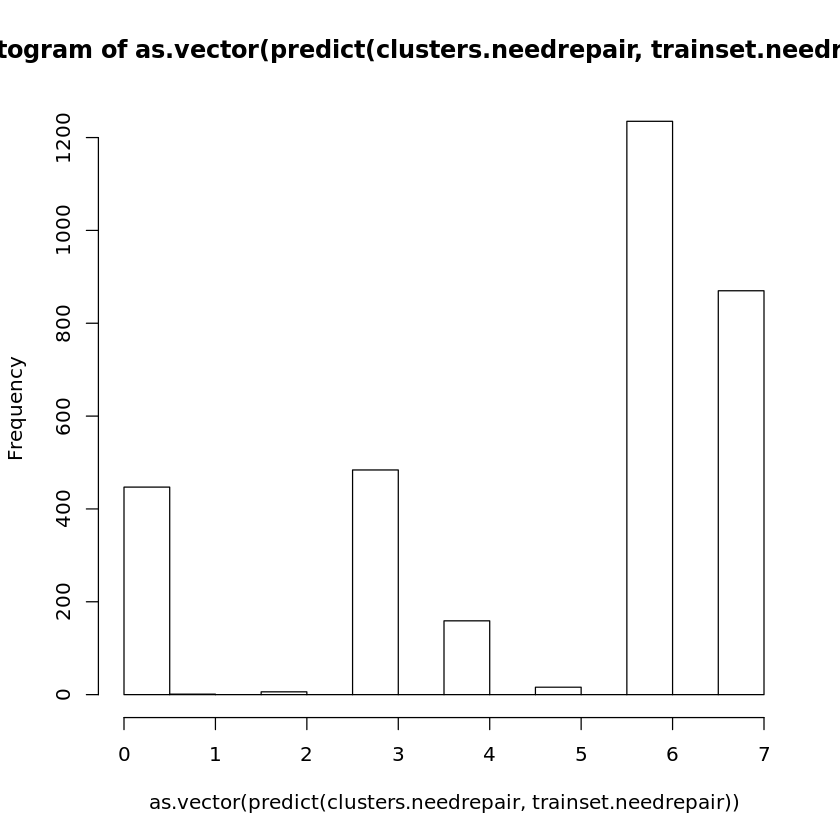

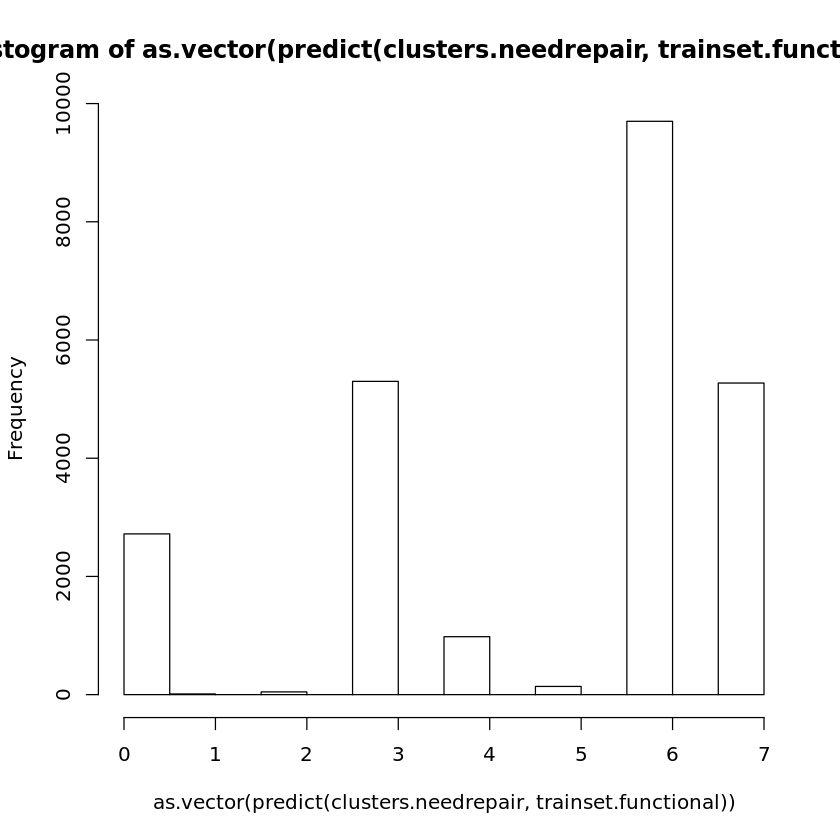

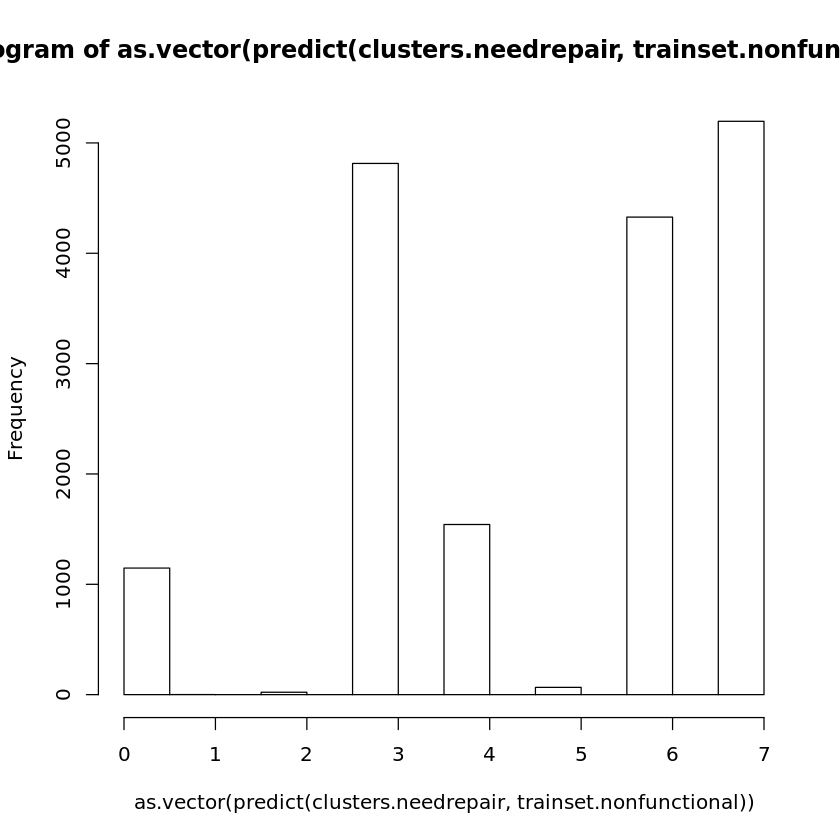

In [131]:
hist(as.vector(predict(clusters.needrepair, trainset.needrepair)))
hist(as.vector(predict(clusters.needrepair, trainset.functional)))
hist(as.vector(predict(clusters.needrepair, trainset.nonfunctional)))

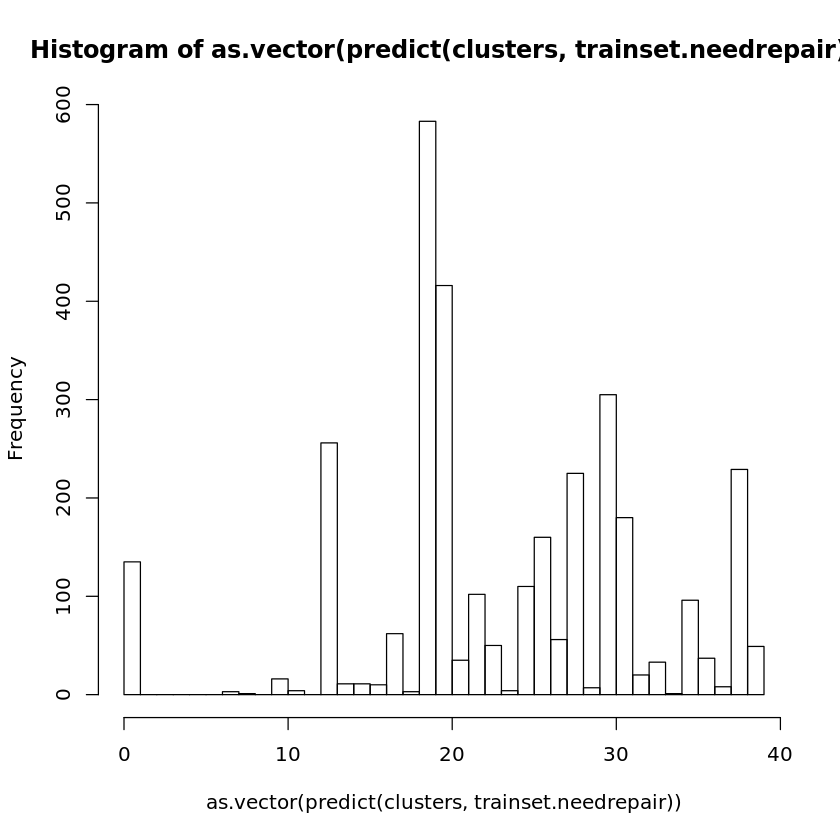

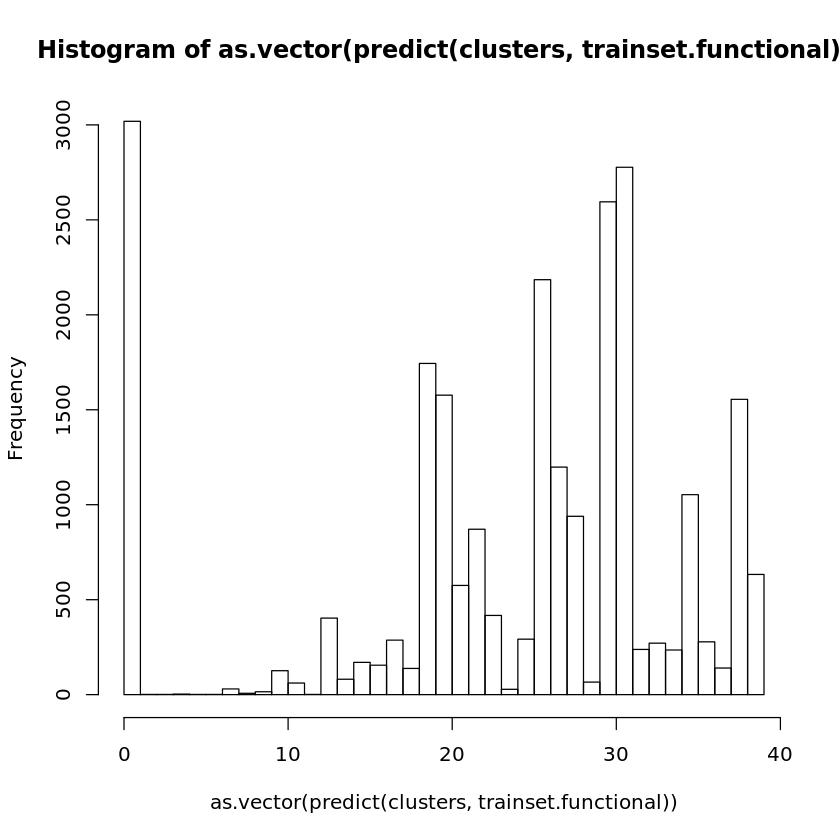

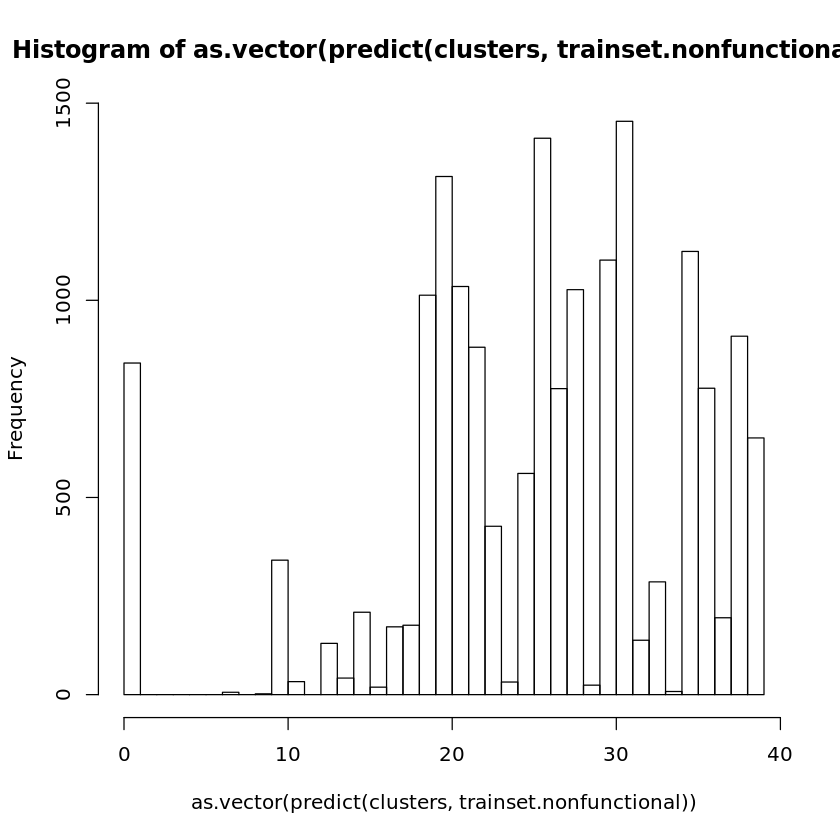

In [134]:
hist(as.vector(predict(clusters, trainset.needrepair)), clusters@parameters$k)
hist(as.vector(predict(clusters, trainset.functional)), clusters@parameters$k)
hist(as.vector(predict(clusters, trainset.nonfunctional)), clusters@parameters$k)

In [141]:
table(as.vector(predict(clusters, trainset.needrepair)),
      as.vector(predict(clusters.needrepair, trainset.needrepair)))

    
       0   1   2   3   4   5   6   7
  0    0   0   0   2   0   2 126   5
  7    0   0   0   3   0   0   0   0
  8    0   1   0   0   0   0   0   0
  10   0   0   0   0  16   0   0   0
  11   0   0   0   3   0   0   1   0
  13 256   0   0   0   0   0   0   0
  14   0   0   6   0   0   5   0   0
  15   0   0   0   0  11   0   0   0
  16   0   0   0   1   0   0   9   0
  17   6   0   0   0   0   0   0  56
  18   0   0   0   0   3   0   0   0
  19   0   0   0   0   0   1 582   0
  20   0   0   0   0   0   0   0 416
  21   0   0   0  34   0   0   0   1
  22   0   0   0  96   0   0   6   0
  23   0   0   0   1   0   0  48   1
  24   0   0   0   0   4   0   0   0
  25   0   0   0   0 110   0   0   0
  26   0   0   0 101   0   0   6  53
  27   0   0   0  56   0   0   0   0
  28   0   0   0   0   0   0   0 225
  29   0   0   0   0   7   0   0   0
  30   0   0   0  22   0   8 272   3
  31 143   0   0   2   0   0   0  35
  32   0   0   0  12   0   0   8   0
  33  33   0   0   0   0   0   0 

In [96]:
trainset.needrepair.clusters <- h2o.cbind(trainset.needrepair, 
                                          h2o.gsub("^", "R_", as.character(predict(clusters.needrepair, trainset.needrepair))))
trainset.functional.clusters <- h2o.cbind(trainset.functional,
                                          h2o.gsub("^", "F_", as.character(predict(clusters, trainset.functional))))
trainset.nonfunctional.clusters <- h2o.cbind(trainset.nonfunctional,
                                          h2o.gsub("^", "N_", as.character(predict(clusters.nonfunctional, trainset.nonfunctional))))

In [97]:
head(trainset.functional.clusters)
head(trainset.needrepair.clusters)
head(trainset.nonfunctional.clusters)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,ellip.h,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,C1
1,69572,6000,1.300061e+12,Roman,1390,Roman,34.93809,-9.856322,none,0,⋯,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,F_0
2,34310,25,1.36175e+12,Lottery Club,686,World vision,37.46066,-3.821329,Kwa Mahundi,0,⋯,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,F_30
3,19728,0,1.310515e+12,Action In A,0,Artisan,31.13085,-1.825359,Shuleni,0,⋯,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,F_28
4,9944,20,1.299974e+12,Mkinga Distric Coun,0,DWE,39.1728,-4.765587,Tajiri,0,⋯,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional,F_26
5,46144,0,1.31233e+12,Isingiro Ho,0,Artisan,30.62699,-1.257051,Kwapeto,0,⋯,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,F_31
6,49056,0,1.29816e+12,Private,62,Private,39.20952,-7.034139,Mzee Hokororo,0,⋯,salty,enough,enough,machine dbh,borehole,groundwater,other,other,functional,F_18


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,ellip.h,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,C1
1,58500,0,1.317686e+12,Unicef,1510,DWE,34.5869,-8.980014,Shuleni,0,⋯,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional needs repair,R_6
2,22308,0,1.36175e+12,Government Of Tanzania,1273,DWE,37.42275,-3.317536,Kwa Tukai,0,⋯,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional needs repair,R_6
3,1843,20,1.363565e+12,Government Of Tanzania,1007,DWE,36.80608,-3.478559,Kwa Bariki,0,⋯,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional needs repair,R_6
4,45111,20,1.360022e+12,Lga,240,LGA,39.08742,-11.0006,Mikoroshini,0,⋯,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional needs repair,R_4
5,31714,0,1.309997e+12,Government Of Tanzania,0,DWE,31.45428,-1.563886,Kwa Mzee Max,0,⋯,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair,R_0
6,2127,500,1.358294e+12,Norad,954,RWE,29.66972,-4.779758,Kwa Jakata,0,⋯,good,enough,enough,river,river/lake,surface,communal standpipe multiple,communal standpipe,functional needs repair,R_6


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,ellip.h,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,C1
1,67743,0,1.359331e+12,Unicef,263,UNICEF,38.48616,-11.1553,Zahanati Ya Nanyumbu,0,⋯,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,N_8
2,19816,0,1.34905e+12,Dwsp,0,DWSP,33.36241,-3.766365,Kwa Ngomho,0,⋯,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional,N_30
3,54551,0,1.349741e+12,Rwssp,0,DWE,32.62062,-4.226198,Tushirikiane,0,⋯,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional,N_30
4,53934,0,1.351901e+12,Wateraid,0,Water Aid,32.7111,-5.146712,Kwa Ramadhan Musa,0,⋯,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional,N_30
5,58155,0,1.315094e+12,Unicef,1656,DWE,34.56927,-9.085515,Kwa Rose Chaula,0,⋯,good,dry,dry,river,river/lake,surface,communal standpipe,communal standpipe,non functional,N_15
6,57355,0,1.364429e+12,Not Known,1546,Not known,36.6187,-3.293003,Sekondari,0,⋯,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,non functional,N_0


In [98]:
fullTrainset <- h2o.rbind(trainset.functional.clusters, trainset.needrepair.clusters, trainset.nonfunctional.clusters)
fullTrainset$clustered_status <- as.factor(fullTrainset$C1)
head(fullTrainset)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,ellip.h,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,C1,clustered_status
1,69572,6000,1.300061e+12,Roman,1390,Roman,34.93809,-9.856322,none,0,⋯,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,F_0,F_0
2,34310,25,1.36175e+12,Lottery Club,686,World vision,37.46066,-3.821329,Kwa Mahundi,0,⋯,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,F_30,F_30
3,19728,0,1.310515e+12,Action In A,0,Artisan,31.13085,-1.825359,Shuleni,0,⋯,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,F_28,F_28
4,9944,20,1.299974e+12,Mkinga Distric Coun,0,DWE,39.1728,-4.765587,Tajiri,0,⋯,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional,F_26,F_26
5,46144,0,1.31233e+12,Isingiro Ho,0,Artisan,30.62699,-1.257051,Kwapeto,0,⋯,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,F_31,F_31
6,49056,0,1.29816e+12,Private,62,Private,39.20952,-7.034139,Mzee Hokororo,0,⋯,enough,enough,machine dbh,borehole,groundwater,other,other,functional,F_18,F_18


In [99]:
allVariables <- colnames(fullTrainset)
predictorsForModel <- allVariables[!(allVariables 
                                           %in% c('id', 'wpt_name', 'subvillage', 'scheme_name', 'installer', 'funder',
                                                  'status_group', 'recorded_by', 'C1', 'clustered_status'))]

In [100]:
rfModel <- h2o.randomForest(predictorsForModel, 'clustered_status', fullTrainset)

  |======================================================================| 100%


Testing:

In [120]:
testing <- h2o.cbind(trainsetFull.split[[2]], predict(rfModel, trainsetFull.split[[2]])$predict)
head(testing,1000)

Warning message:
In `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, : duplicated levels in factors are deprecatedWarning message:
In `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, : duplicated levels in factors are deprecated

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,ellip.h,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,predict
1,8776,0,1.362528e+12,Grumeti,1399,GRUMETI,34.69877,-2.147466,Zahanati,0,⋯,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,functional
2,50409,200,1.361146e+12,Danida,1062,DANIDA,35.77026,-10.57417,Kwa Alid Nchimbi,0,⋯,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,functional
3,36957,0,1.350173e+12,World Vision,0,World vision,33.79811,-3.290194,Pamba,0,⋯,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,functional
4,48451,500,1.309738e+12,Unicef,1703,DWE,34.64244,-9.106185,Kwa John Mtenzi,0,⋯,good,dry,dry,river,river/lake,surface,communal standpipe,communal standpipe,non functional,non functional
5,34169,0,1.311293e+12,Hesawa,1162,DWE,32.92015,-1.947868,Ngomee,0,⋯,milky,insufficient,insufficient,spring,spring,groundwater,other,other,functional needs repair,functional needs repair
6,18274,500,1.298333e+12,Danida,1763,Danid,34.50897,-9.894412,none,0,⋯,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,functional


In [77]:
library('magrittr')

In [142]:
cm <- testing$predict %>% h2o.gsub("R_.*", 'functional needs repair', .) %>%
                    h2o.gsub("N_.*", 'non functional', .) %>%
                    h2o.gsub("F_.*", 'functional', .) %>%
                    as.vector %>%
                    table(as.vector(testing$status_group), .)

sum(diag(cm)) / sum(cm)
hitRatios <- c(functional = cm[1,1] / sum(cm[1,]),
                'functional needs repair' = cm[2,2] / sum(cm[2,]),
                'non functional' = cm[3,3] / sum(cm[3,]))
hitRatios
1- hitRatios
cm


ERROR: Unexpected HTTP Status code: 400 Bad Request (url = http://127.0.0.1:54321/99/Rapids)

java.lang.IllegalArgumentException
 [1] "water.rapids.Env.lookup(Env.java:123)"                                                
 [2] "water.rapids.ASTId.exec(AST.java:287)"                                                
 [3] "water.rapids.ASTColSlice.apply(ASTColSlice.java:19)"                                  
 [4] "water.rapids.ASTExec.exec(ASTExec.java:46)"                                           
 [5] "water.rapids.ASTReplaceAll.apply(ASTStrOp.java:473)"                                  
 [6] "water.rapids.ASTExec.exec(ASTExec.java:46)"                                           
 [7] "water.rapids.ASTReplaceAll.apply(ASTStrOp.java:473)"                                  
 [8] "water.rapids.ASTExec.exec(ASTExec.java:46)"                                           
 [9] "water.rapids.ASTReplaceAll.apply(ASTStrOp.java:473)"                                  
[10] "water.rapids.ASTExec.exec(A

ERROR: Error in .h2o.doSafeREST(h2oRestApiVersion = h2oRestApiVersion, urlSuffix = page, : Name lookup of 'RTMP_78' failed


[1] 0.8066984

functional functional needs repair          non functional 
              0.8886555               0.3457689               0.7792572

functional functional needs repair          non functional 
              0.1113445               0.6542311               0.2207428

                         .
                          functional functional needs repair non functional
  functional                    7191                     184            717
  functional needs repair        544                     380            175
  non functional                1164                      96           4448

In [65]:
validation.hex <- h2o.uploadFile(path = 'testset_values.csv', destination_frame = 'validation.hex', sep = ',', header = TRUE)

  |======================================================================| 100%


In [117]:
valid <- h2o.predict(rfModel, validation.hex)
preds <- valid$predict %>% h2o.gsub("R_.*", 'functional needs repair', .) %>%
                    h2o.gsub("N_.*", 'non functional', .) %>%
                    h2o.gsub("F_.*", 'functional', .) %>%
                    as.factor %>% as.vector
head(preds)

Warning message:
In `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, : duplicated levels in factors are deprecatedWarning message:
In `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, : duplicated levels in factors are deprecated

[1] "non functional" "functional"     "functional"     "non functional"
[5] "functional"     "functional"

In [118]:
submission <- data.frame(as.data.frame(validation.hex$id), as.data.frame(preds))
colnames(submission) <- c('id', 'status_group')
write.table(submission, 
            paste0('rfH2oSubmission', format(Sys.time(), "%Y%m%d_%H%M%S"), '.csv'),
            row.names = FALSE,
            sep=',', quote = FALSE)